## Hierarhično gručenje

##### Odgovor 5-2-1

V splošnem: $O(n^3)$

Določeni primeri: $O(n^2)$

Za razliko od KMeans ima hierarhično gručenje naslednje lastnosti:
- ne zahteva, da vnaprej določimo število gruč,
- omogoča uporabo različnih mer razdalje in načinov povezovanja,
- vendar postane počasno pri zelo velikih podatkovnih zbirkah.

##### Odgovor 5-2-2

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

data = pd.read_table('../data/zoo.tab', skiprows=[1,2])
X = data.iloc[:,:16]
Y = data.iloc[:,16]

In [2]:
def plot_dendrogram(L):
    plt.figure(figsize=(25, 6))
    labels = data['name'].values
    sch.dendrogram(L, labels=labels, leaf_font_size=15)
    plt.ylabel("Razdalja")
    plt.show()

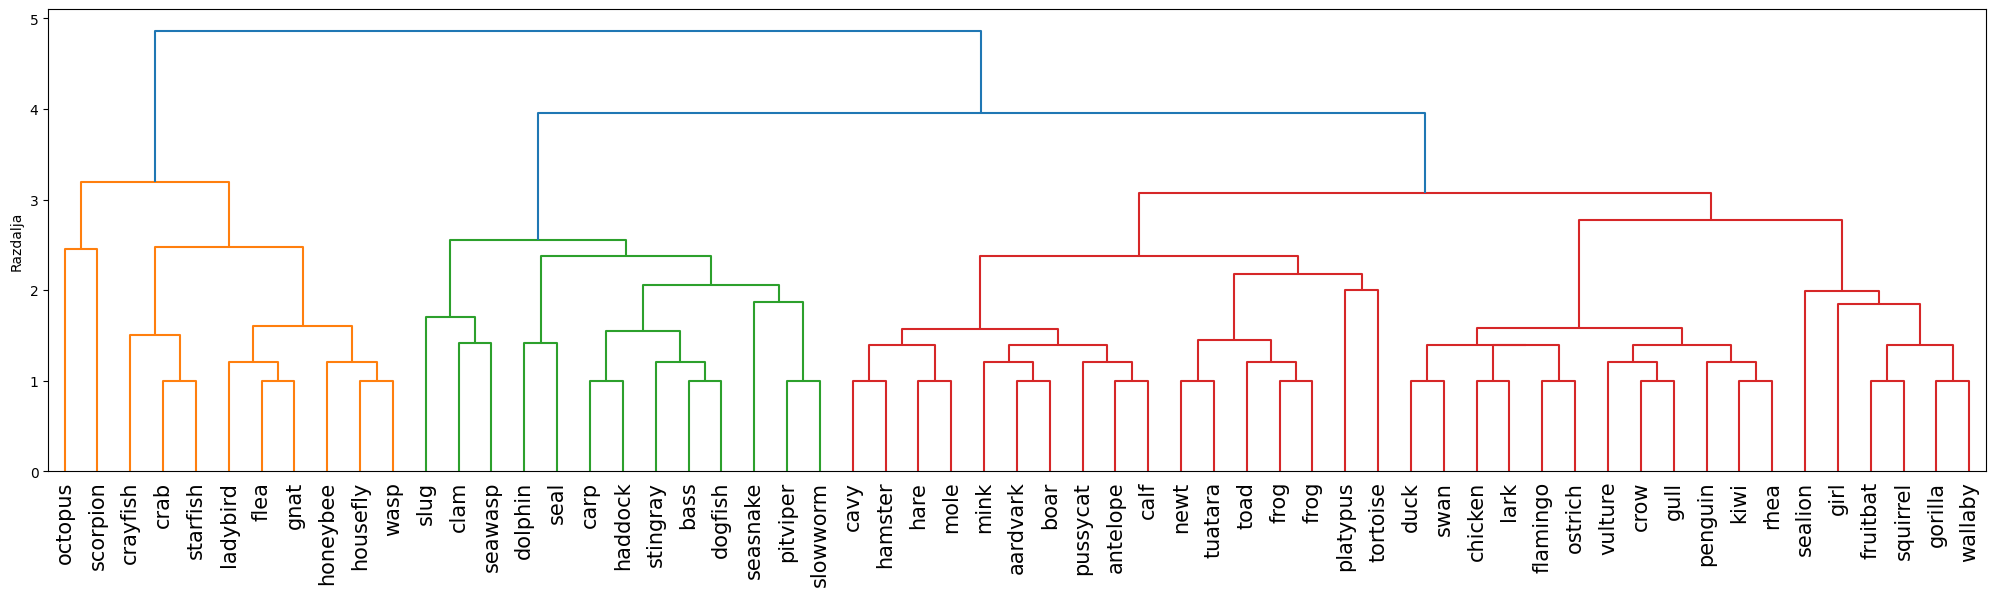

In [3]:
L = sch.linkage(X, method="average")
plot_dendrogram(L)

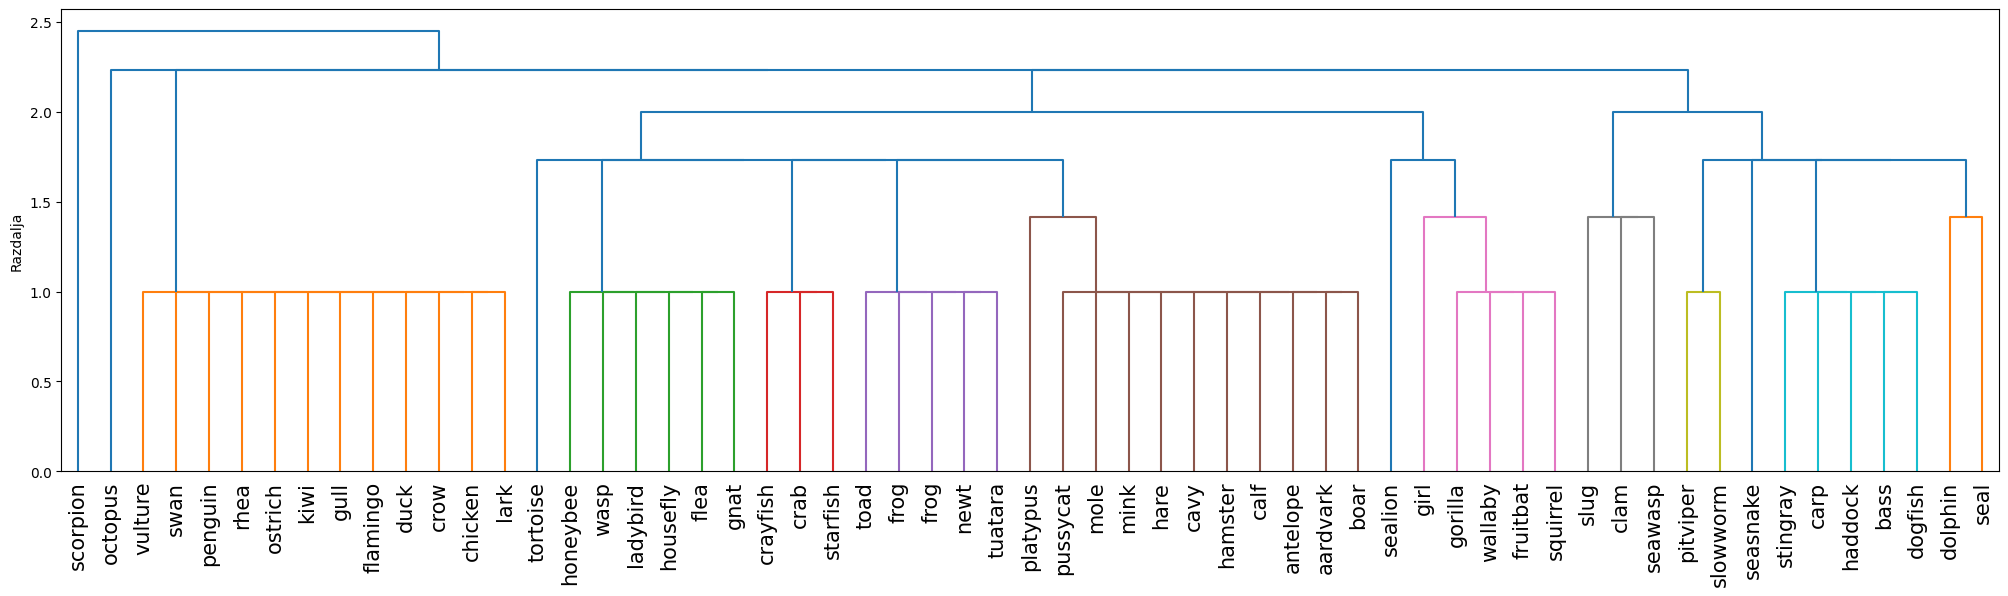

In [4]:
L = sch.linkage(X, method="single")
plot_dendrogram(L)

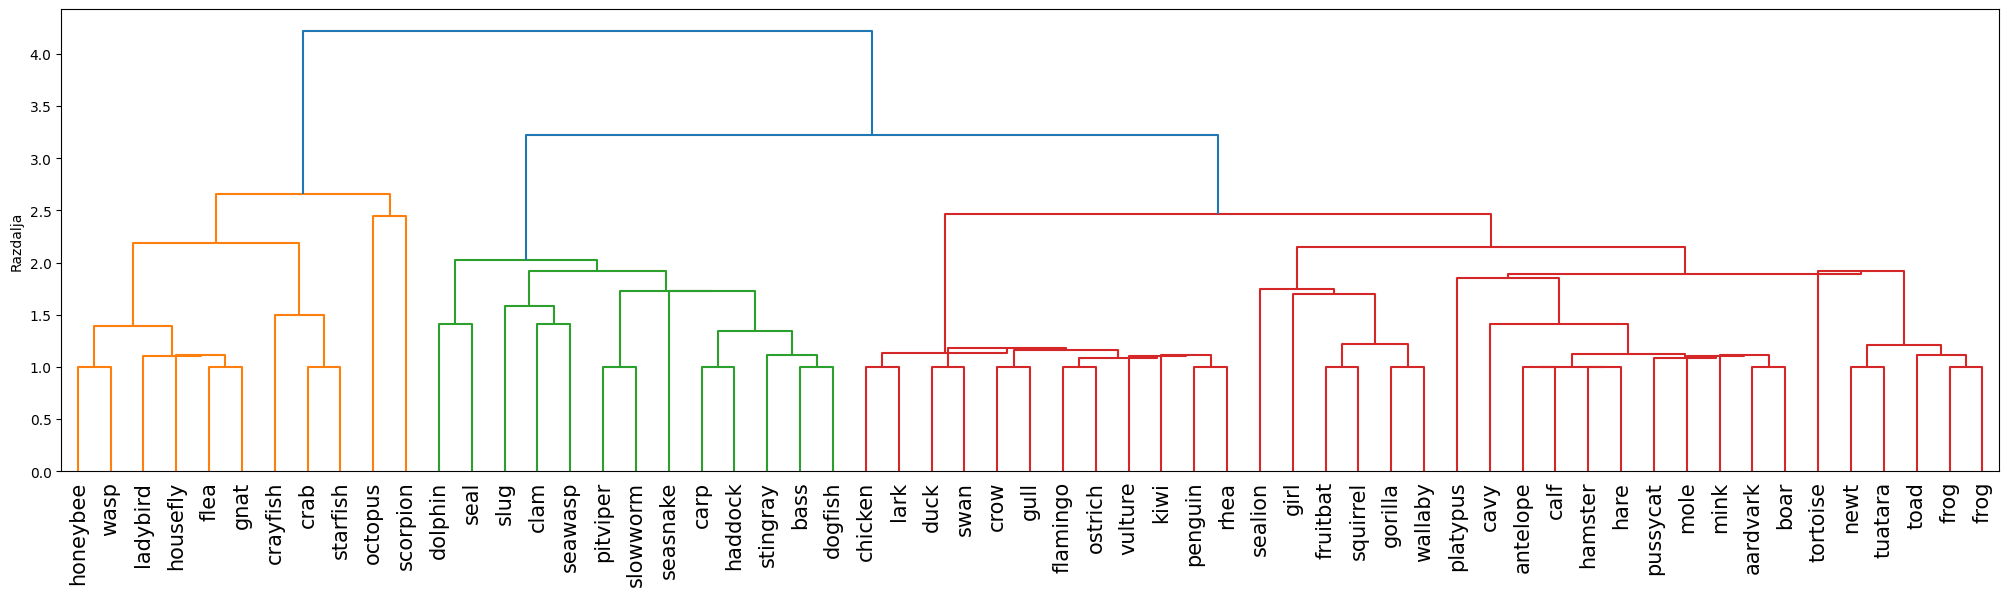

In [5]:
L = sch.linkage(X, method="centroid")
plot_dendrogram(L)

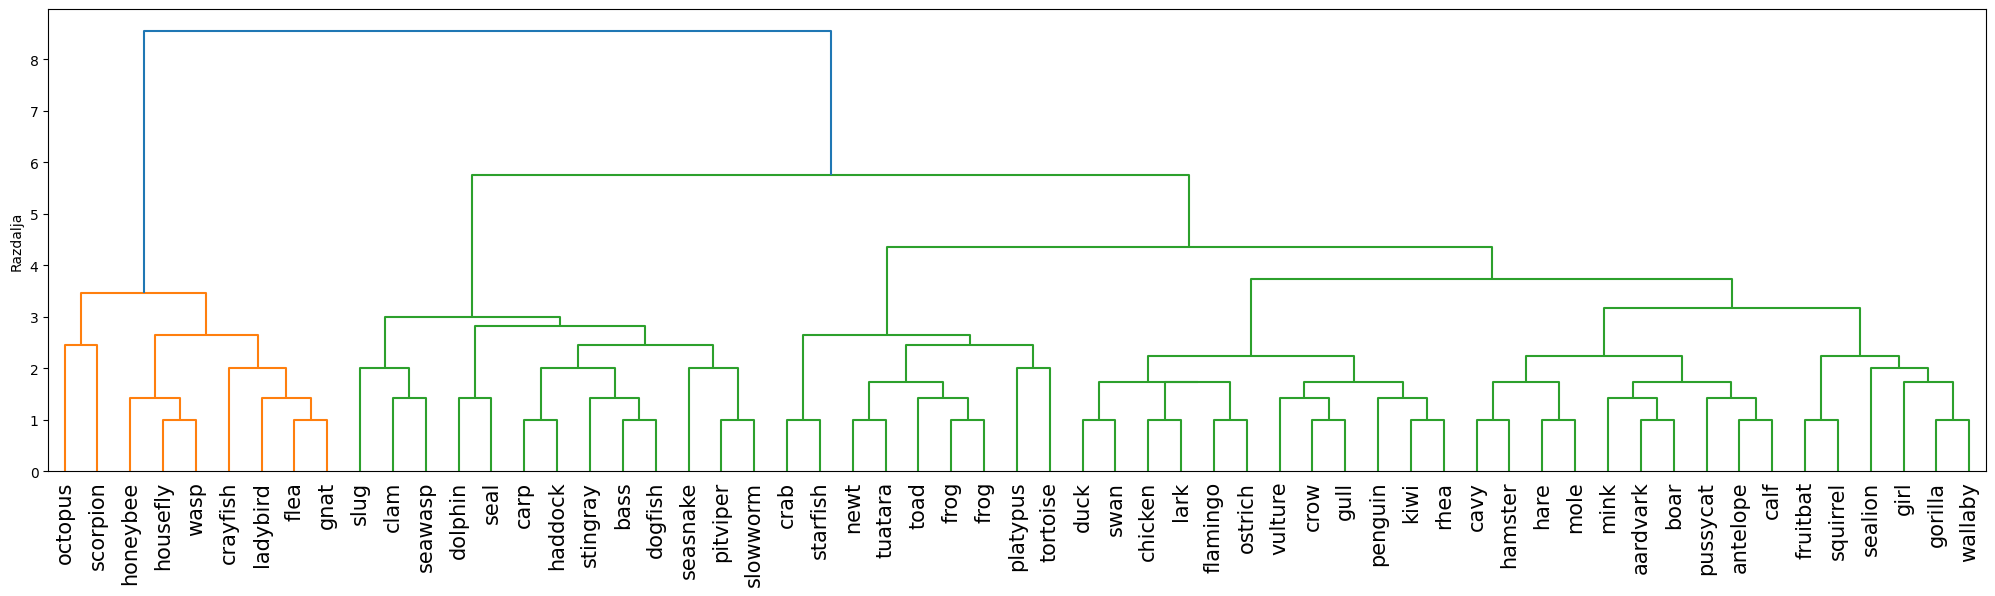

In [6]:
L = sch.linkage(X, method="complete")
plot_dendrogram(L)

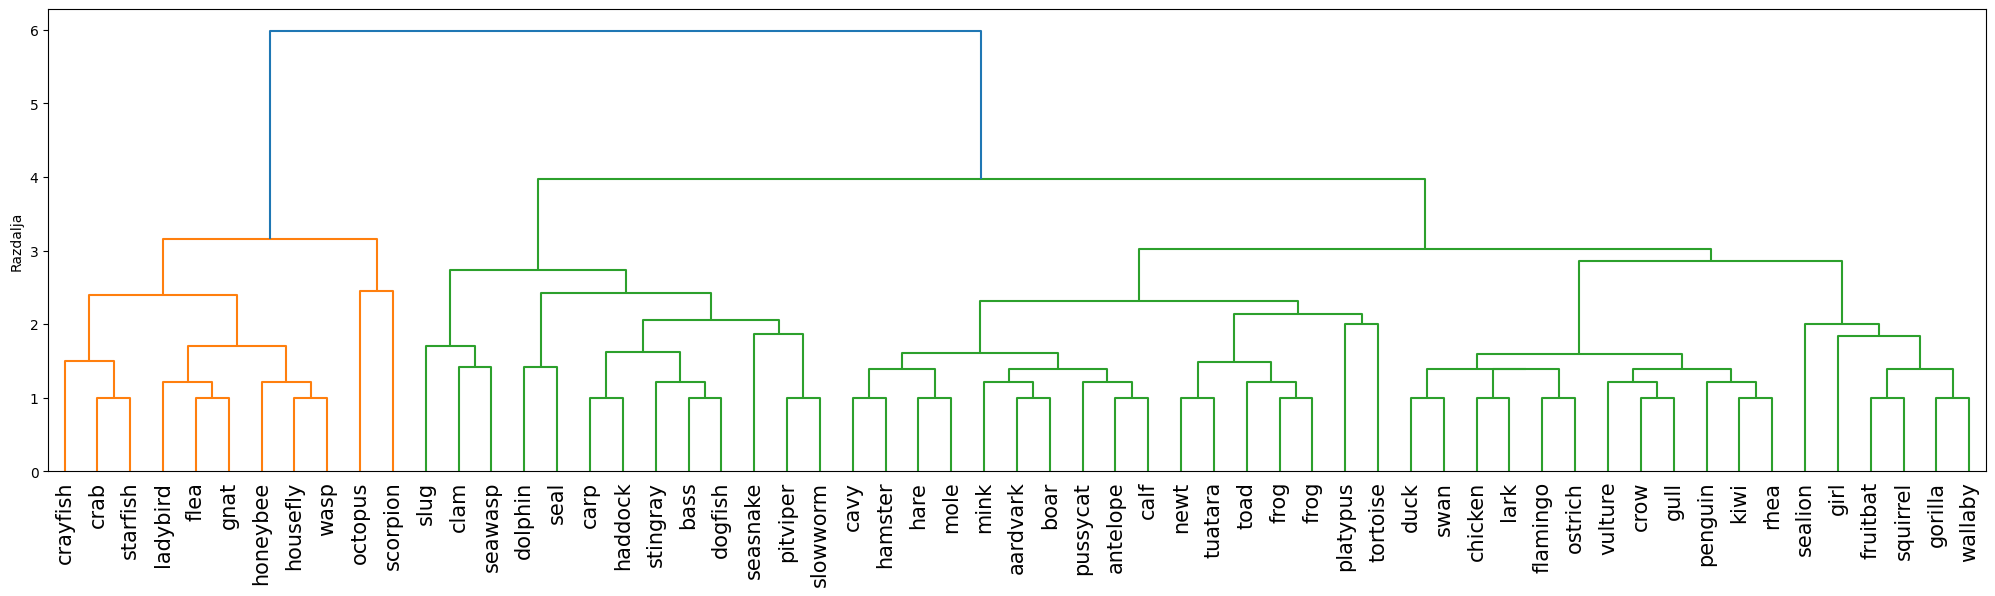

In [7]:
L = sch.linkage(X, method="weighted")
plot_dendrogram(L)

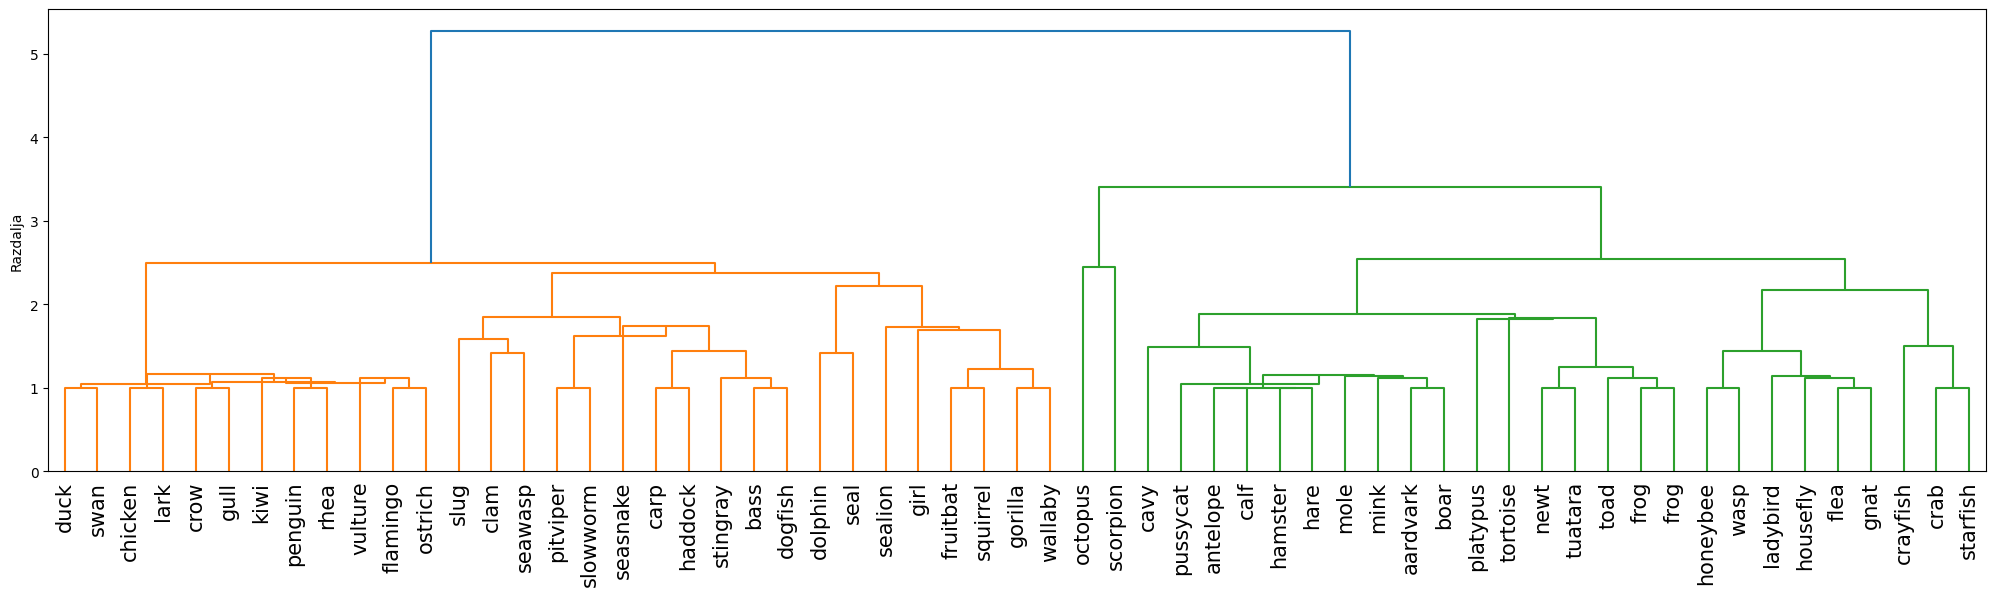

In [8]:
L = sch.linkage(X, method="median")
plot_dendrogram(L)

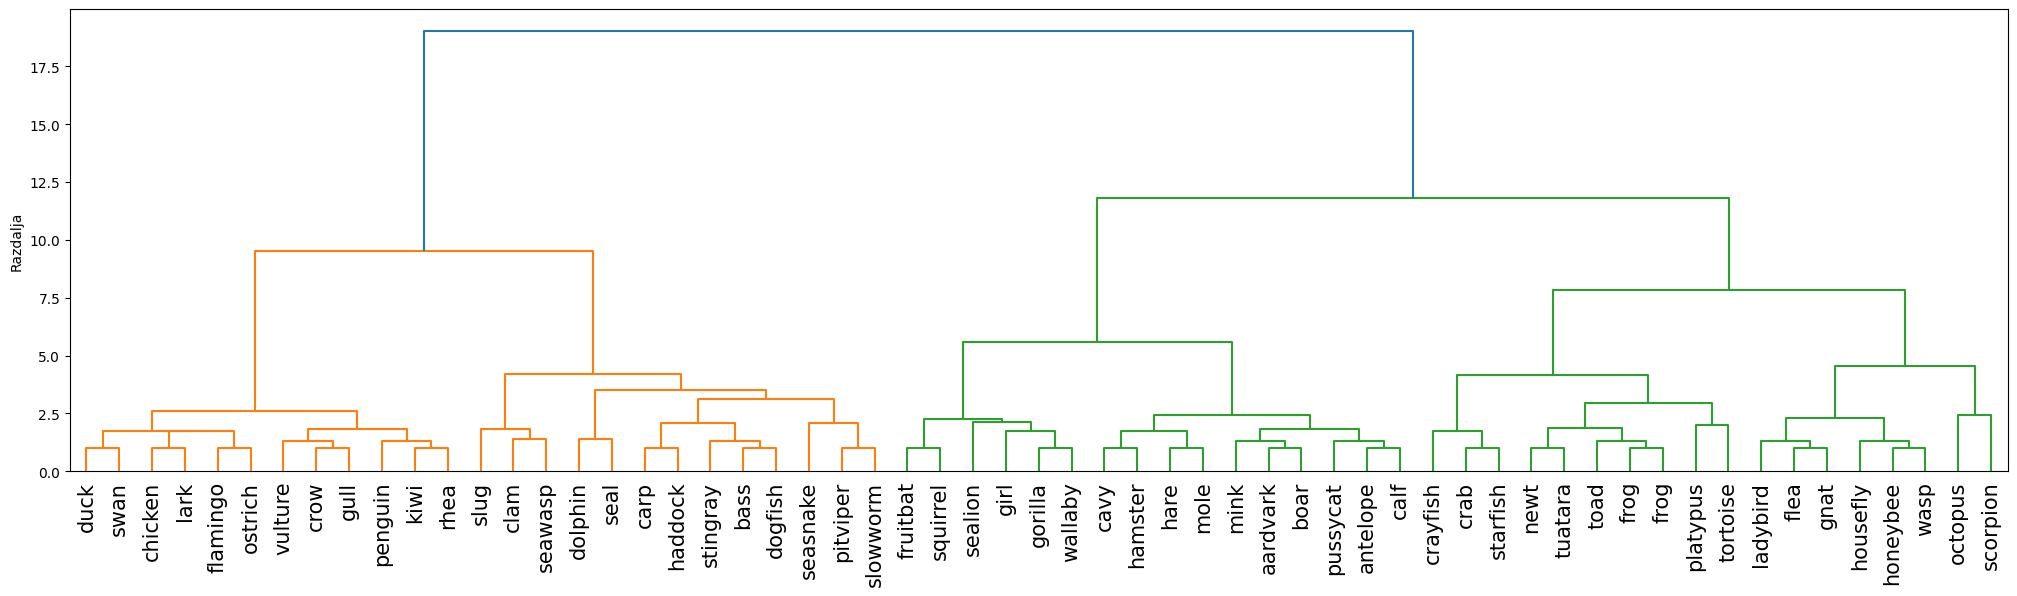

In [9]:
L = sch.linkage(X, method="ward")
plot_dendrogram(L)

##### Odgovor 5-2-3

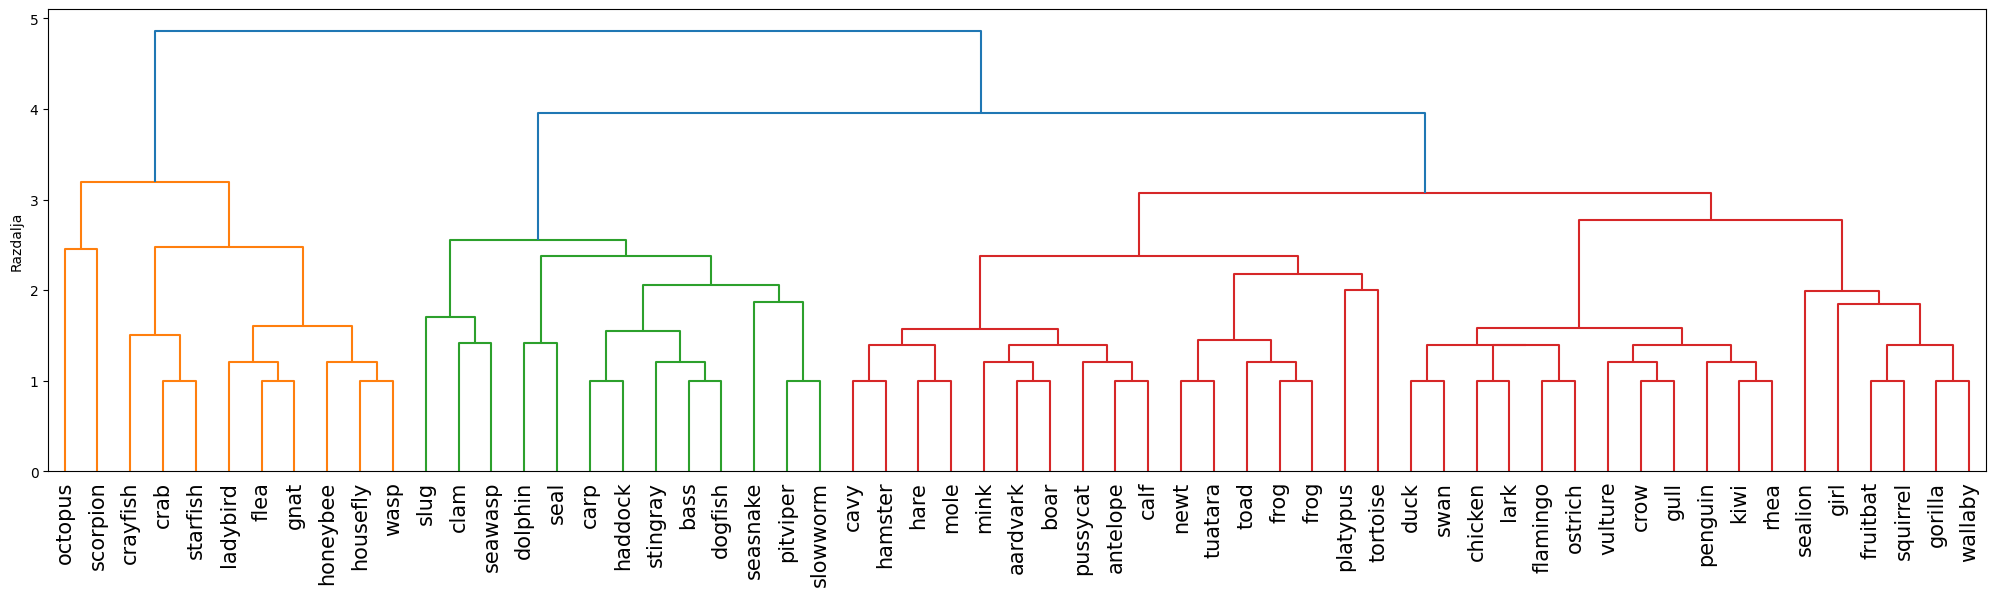

In [10]:
L = sch.linkage(X, method="average", metric="euclidean")
plot_dendrogram(L)

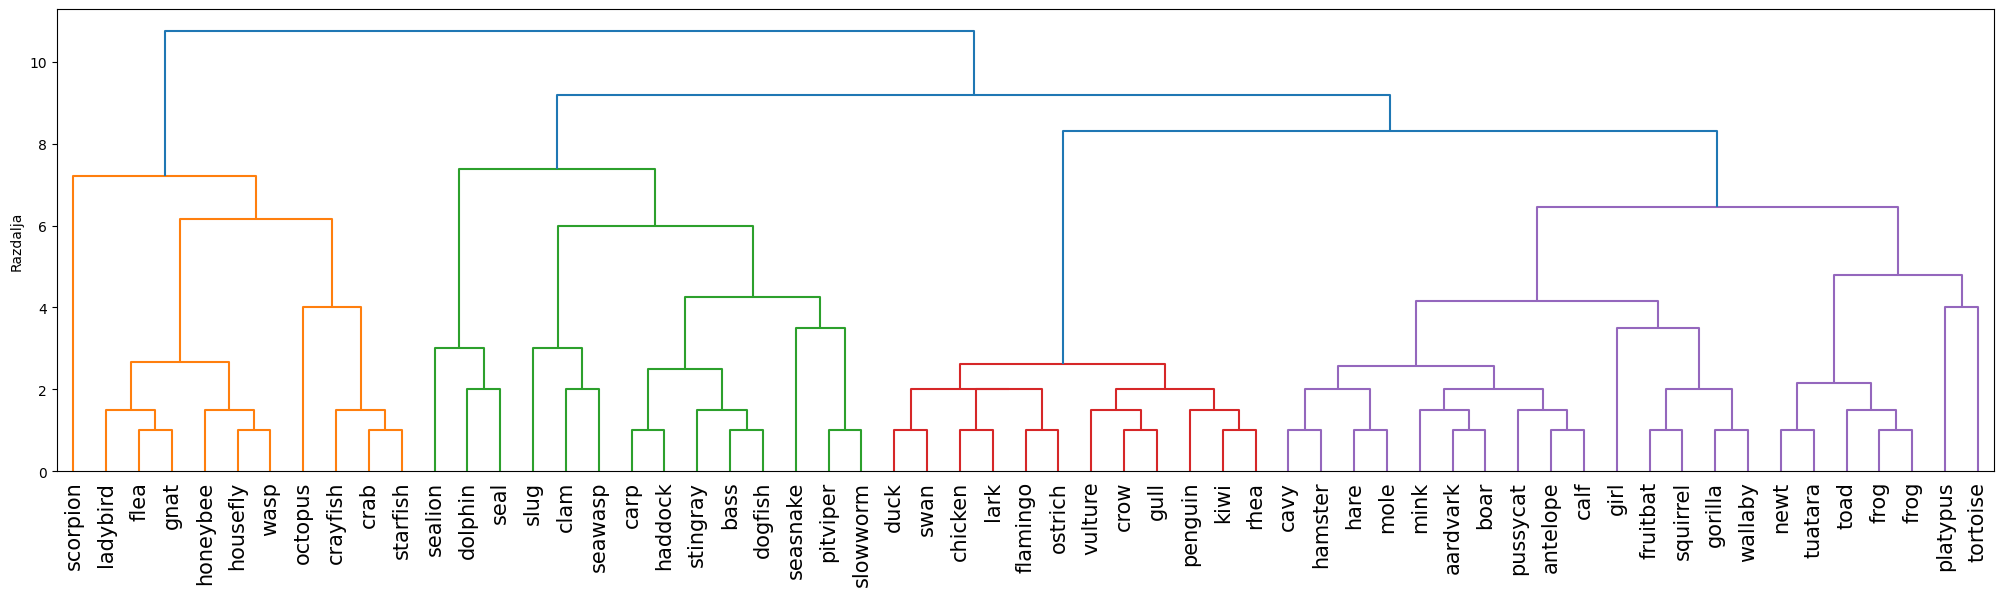

In [11]:
L = sch.linkage(X, method="average", metric="cityblock")
plot_dendrogram(L)

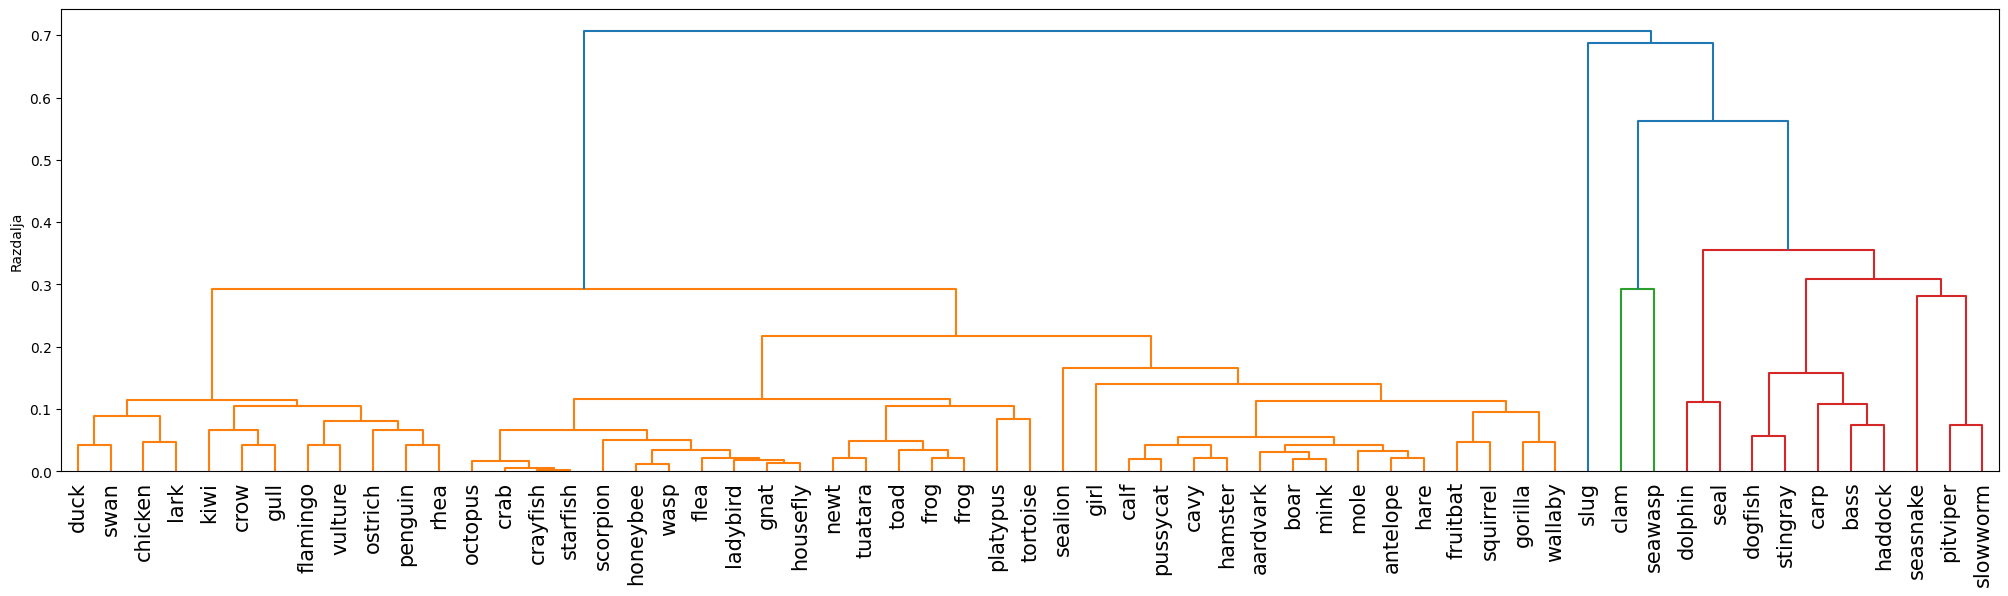

In [12]:
L = sch.linkage(X, method="average", metric="cosine")
plot_dendrogram(L)

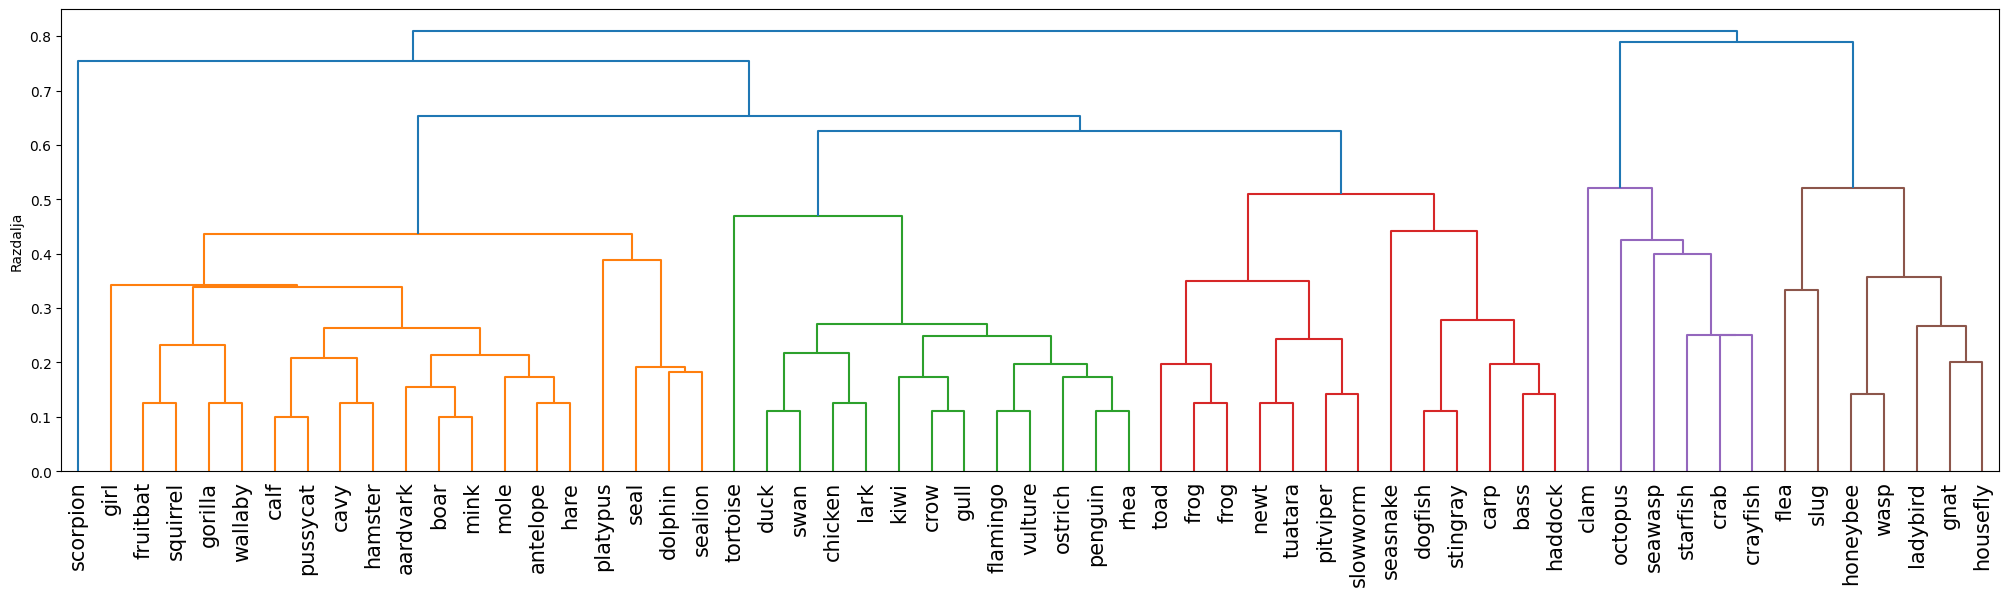

In [13]:
L = sch.linkage(X, method="average", metric="jaccard")
plot_dendrogram(L)

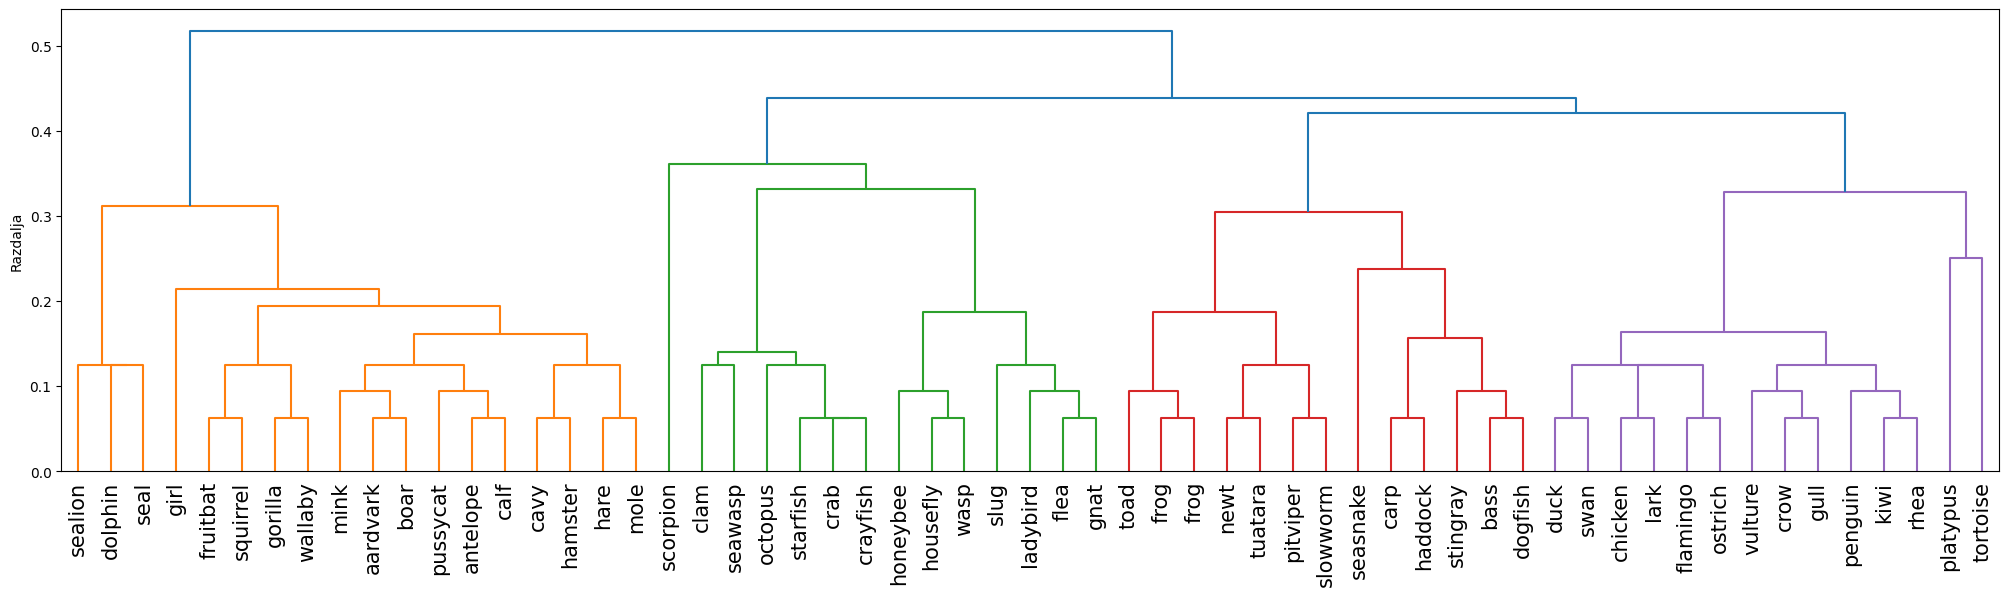

In [14]:
L = sch.linkage(X, method="average", metric="hamming")
plot_dendrogram(L)

##### Odgovor 5-2-4

In [15]:
from sklearn.metrics import adjusted_mutual_info_score

classes = data['type'].values 
L = sch.linkage(X, method="average", metric="cityblock")

for t in range(1, 11):
    predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
    score = adjusted_mutual_info_score(classes, predictions)
    print("t= {:2}: {:.3f}".format(t, score))

t=  1: 0.267
t=  2: 0.578
t=  3: 0.746
t=  4: 0.781
t=  5: 0.795
t=  6: 0.757
t=  7: 0.668
t=  8: 0.631
t=  9: 0.447
t= 10: 0.307


In [16]:
L = sch.linkage(X, method="average", metric="hamming")
top = sch.maxdists(L).max()

In [17]:
import numpy as np
np.linspace(0, top, 12)[1:-1]

array([0.04699433, 0.09398867, 0.140983  , 0.18797733, 0.23497167,
       0.281966  , 0.32896034, 0.37595467, 0.422949  , 0.46994334])

##### Odgovor 5-2-5

In [18]:
scores = []
for method in ["single", "complete", "average", "weighted", "centroid", "median", "ward"]:
    for metric in ["euclidean", "cityblock", "cosine", "jaccard", "hamming"]:
        try:
            L = sch.linkage(X, method=method, metric=metric)
            top = sch.maxdists(L).max()
            for t in np.linspace(0, top, 12)[1:-1]:
                predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
                score = adjusted_mutual_info_score(classes, predictions)
                scores.append((method, metric, t, score))
        except Exception as e:
            pass

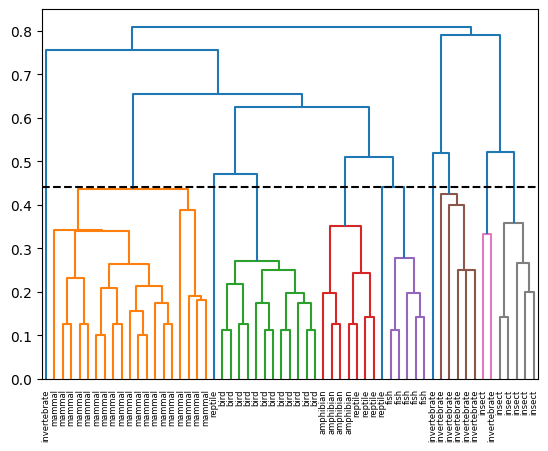

In [19]:
scores.sort(key=lambda x: x[3], reverse=True)
best = scores[0]

L = sch.linkage(X, method=best[0], metric=best[1])
sch.dendrogram(L, color_threshold=best[2], labels=classes)
plt.axhline(y=best[2], color='black', linestyle='--')
plt.show()